If you don't have installed jupyter notebook you can run this code online here: 


https://jupyter.org/try

1. Choose JupyterLab
2. Choose python 3 
3. Load this file just by dropping it in place where are other sample files 



In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on 
Essentialy, we will create "fake" data with a linear relationship 

In [2]:
observations = 10000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))

np.random.uniform(low,high,size) draws a random value from the interval (low high), where each number has an equal chance to be selected

np.column_stack((apropiate tuples)) - takes a sequence od 1D arrays and stack them into a single 2D array 


Robimy to, bo możemy mnożyć tylko matryce o takiej samej wymiarowości

In [3]:
print (inputs.shape)

(10000, 2)


In supervised learning we have to know: 
inputs and targets 

weights and biases are changeg by algorithm 

target = f(x,z) = 2 * x - 3 * z + 5 + noise 

In [4]:
# weights = 2 i -3 
# bias = 5 
# noise - randomized data 

In [5]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2 * xs - 3 * zs + 5 + noise 

print(targets.shape)

(10000, 1)


### Plot the training data
To see that there is a strong trend that our model should learn to reproduce

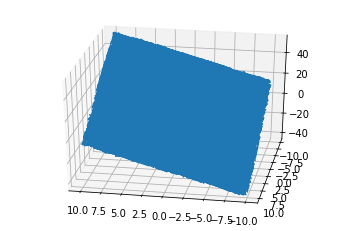

In [6]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

We dont want to start fron any arbitrary number, rather, we randomly select some small initial weights 

### Initialize variables: 

In [7]:
init_range = 0.1 

weights = np.random.uniform(-init_range, init_range, size=(2,1))
#bo W to wektor 2x1 
#dodajemy bias tak samo

biases = np.random.uniform(-init_range, init_range, size=1)
# 1 - bo biases jest scalarem 
# In ML there are as many biases as there are outputs

In [8]:
print(weights)

[[-0.00168135]
 [-0.05608132]]


In [9]:
print(biases)

[-0.01271659]


Our initial weights and biases will be picked randomly from the interval [-0.1,01]

### Set a learning rate: 

In [10]:
learning_rate = 0.02

### Train the model:

It have to be loop, because we will use rule of actualization:  

np.dot(A,B) is a method used for multiplying matrices. Alteratively, we can use the A.dot(B) to perform the same operation 

In [11]:
for i in range (100): 
    outputs = np.dot(inputs, weights) + biases 
    deltas = outputs - targets 
    #deltas records the difference between output and targets 
    # we will use L2-norm loss / 2 
    #np.sum(a) is a method that allows us to sum all the values in the array
    loss = np.sum(deltas ** 2) / 2 / observations 
    #mean 
    
    
    print(loss)
    #we print the loss at each step, as we want to keep an eye on whether it is decrasing
    
    deltas_scaled = deltas / observations 
    
    weights = weights - learning_rate * np.dot(inputs.T , deltas_scaled)
    #inputs.T is a method used for transposing matrices, inaczej nie możemy ich mnożyć 
    
    biases = biases - learning_rate * np.sum(deltas_scaled)

224.43815400005923
35.72293882043951
14.384665421859733
11.612256226296202
10.91405754235327
10.461330220851794
10.050689179357441
9.658988373368787
9.283094895430894
8.922118403357993
8.57543888979594
8.242486989521094
7.922718778763539
7.6156121927585305
7.3206658742721515
7.0373983219024145
6.7653471003348296
6.5040680850049295
6.2531347370178185
6.012137406816859
5.780682665428824
5.55839266218965
5.344904507901937
5.139869682417072
4.942953465674883
4.753834391271986
4.572203721666775
4.397764944164323
4.2302332868583745
4.069335253740231
3.914808178215576
3.766399794300349
3.6238678247956524
3.4869795857694044
3.355511606698991
3.2292492656548917
3.10798643892963
2.9915251645401004
2.8796753190539564
2.7722543072124557
2.6690867638430587
2.5700042675751913
2.4748450658917625
2.383453811067636
2.295681306563922
2.211384263464119
2.130425066554462
2.0526715496666084
1.977996779915913
1.9062788504830601
1.8374006816007524
1.771249829420596
1.7077183024481222
1.6467023852463034
1.588

We have minimized (or almost) the loss w.r.t. the weights and the biases 

### print weights and biases and see if have worked correclty
In the memory of computer, the variables: weights, biases and outputs contain their optimized values: those from the las iteration of the loop

In [12]:
print(weights, biases)

[[ 2.00165483]
 [-3.0004657 ]] [4.34179362]


In [16]:
# first W - close to 2 
# second W - close to -3 
# biases - close to 5 

In [17]:
# we can run loop once again with different parametrs to improve:

In [18]:
print(weights, biases)

[[ 2.00165483]
 [-3.0004657 ]] [4.34179362]
